In [ ]:
# 닥터나우 
# id : 1513718380

# tigerconnect
# id : 355832697

# https://zzsza.github.io/development/2019/03/12/crawling-in-developer-tools-console/
# https://kibua20.tistory.com/196

#닥터나우

In [ ]:
!pip install xmltodict

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy wordcloud

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,295 kB]
Hit:12 http://ppa.launchpad.net/cra

In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 43 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-extra all 20170925-1 [12.2 MB]
Get:4 http://archive.ubu

In [ ]:
import pandas as pd
import xmltodict 
import requests 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
import json
import re
from bs4 import BeautifulSoup
import warnings
import numpy as np
# from konlpy.tag import Twitter
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!/usr/bin/python3 # -*- coding: utf-8 -*- 


In [ ]:
#!/usr/bin/python3 # -*- coding: utf-8 -*- 

def get_url_index(url): 
  response = requests.get(url).content.decode('utf8') 
  xml = xmltodict.parse(response) 
  last_url = [l['@href'] for l in xml['feed']['link'] if (l['@rel'] == 'last')][0] 
  last_index = [int(s.replace('page=', '')) for s in last_url.split('/') if ('page=' in s)][0] 
  return last_index 
  
  # https://stackoverflow.com/questions/1090282/api-to-monitor-iphone-app-store-reviews 
def appstore_crawler(appid, outfile='./appstore_reviews.csv'): 
  url = 'https://itunes.apple.com/us/rss/customerreviews/page=1/id=%i/sortby=mostrecent/xml' % appid 
  try: 
    last_index = get_url_index(url) 
  except Exception as e: 
    print (url) 
    print ('\tNo Reviews: appid %i' %appid) 
    print ('\tException:', e) 
    return 
      
  result = list() 
  for idx in range(1, last_index+1): 
    url = "https://itunes.apple.com/us/rss/customerreviews/page=%i/id=%i/sortby=mostrecent/xml?urlDesc=/customerreviews/id=%i/sortBy=mostRecent/xml" % (idx, appid, appid) 
    print(url) 
    response = requests.get(url).content.decode('utf8') 
    try: 
      xml = xmltodict.parse(response) 
    except Exception as e: 
      print ('\tXml Parse Error %s\n\tSkip %s :' %(e, url)) 
      continue 
    try: 
      num_reivews= len(xml['feed']['entry']) 
    except Exception as e: 
      print ('\tNo Entry', e) 
      continue 
    
    try: 
      xml['feed']['entry'][0]['author']['name'] 
      single_reviews = False 
    except: 
      #print ('\tOnly 1 review!!!') 
      single_reviews = True 
      pass 
    
    if single_reviews: 
      result.append({ 'USER': xml['feed']['entry']['author']['name'], 
                      'DATE': xml['feed']['entry']['updated'], 
                      'STAR': int(xml['feed']['entry']['im:rating']), 
                      'LIKE': int(xml['feed']['entry']['im:voteSum']), 
                      'TITLE': xml['feed']['entry']['title'], 
                      'REVIEW': xml['feed']['entry']['content'][0]['#text'], }) 
    else: 
      for i in range(len(xml['feed']['entry'])): 
        result.append({ 'USER': xml['feed']['entry'][i]['author']['name'], 
                        'DATE': xml['feed']['entry'][i]['updated'], 
                        'STAR': int(xml['feed']['entry'][i]['im:rating']), 
                        'LIKE': int(xml['feed']['entry'][i]['im:voteSum']), 
                        'TITLE': xml['feed']['entry'][i]['title'], 
                        'REVIEW': xml['feed']['entry'][i]['content'][0]['#text']}) 
  res_df = pd.DataFrame(result) 
  res_df['DATE'] = pd.to_datetime(res_df['DATE'], format="%Y-%m-%dT%H:%M:%S") 
  res_df.to_csv(outfile, encoding='utf-8-sig', index=False) 
  print ('Save reviews to file: %s \n' %(outfile)) 

if __name__ == '__main__': 
  app_id = 355832697 
  outfile = os.path.join('/content/drive/MyDrive/puzzleAI/스토어 앱리뷰 분석/'+'appstore_' + str(app_id)+'.csv') 
  appstore_crawler(app_id, outfile=outfile)


https://itunes.apple.com/us/rss/customerreviews/page=1/id=355832697/sortby=mostrecent/xml?urlDesc=/customerreviews/id=355832697/sortBy=mostRecent/xml
https://itunes.apple.com/us/rss/customerreviews/page=2/id=355832697/sortby=mostrecent/xml?urlDesc=/customerreviews/id=355832697/sortBy=mostRecent/xml
https://itunes.apple.com/us/rss/customerreviews/page=3/id=355832697/sortby=mostrecent/xml?urlDesc=/customerreviews/id=355832697/sortBy=mostRecent/xml
https://itunes.apple.com/us/rss/customerreviews/page=4/id=355832697/sortby=mostrecent/xml?urlDesc=/customerreviews/id=355832697/sortBy=mostRecent/xml
https://itunes.apple.com/us/rss/customerreviews/page=5/id=355832697/sortby=mostrecent/xml?urlDesc=/customerreviews/id=355832697/sortBy=mostRecent/xml
https://itunes.apple.com/us/rss/customerreviews/page=6/id=355832697/sortby=mostrecent/xml?urlDesc=/customerreviews/id=355832697/sortBy=mostRecent/xml
https://itunes.apple.com/us/rss/customerreviews/page=7/id=355832697/sortby=mostrecent/xml?urlDesc=/c

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/puzzleAI/스토어 앱리뷰 분석/appstore_355832697.csv')
df

,USER,DATE,STAR,LIKE,TITLE,REVIEW
0,DL Seattle,2021-08-10 16:27:30-07:00,5,0,Enterprise Solutions,The ability to document share and forward mess...
1,Miranda Graham,2021-07-30 06:08:48-07:00,3,0,Notification issues,I have had issues where I continually am notif...
2,Christianhowes,2021-04-13 03:29:25-07:00,1,1,Halo was Better,Please model this after Halo (doc halo). Unfor...
3,got shored,2021-04-04 08:00:26-07:00,1,0,Needs to repeat internship,Very buggy program and unreliable service. Me...
4,coco2698,2021-02-24 15:18:23-07:00,1,0,Legally worrisome for physicians,I am a surgeon and take call for emergencies—b...
...,...,...,...,...,...,...
495,Cransta,2012-02-29 07:35:52-07:00,5,0,Tiger text,This is a solid app & does what I \nexpected i...
496,RUTHHORAN,2012-02-27 14:06:34-07:00,4,0,Fun.,It's okay but sometimes doesn't let me send me...
497,drachala,2012-02-26 21:00:10-07:00,5,0,Nice App but,Would love to have a option to increase alert ...
498,loganza,2012-02-23 12:15:20-07:00,5,0,Awesome,"Add me, lets talk about stuff! Ha 22/m/tx thee..."


In [ ]:
df = df.sort_values(by='DATE', ascending=False).reindex()

In [ ]:
print("최소 :", min(df['DATE'].value_counts().index))
print("최대 :", max(df['DATE'].value_counts().index))

최소 : 2012-02-20 19:46:41-07:00
최대 : 2021-08-10 16:27:30-07:00


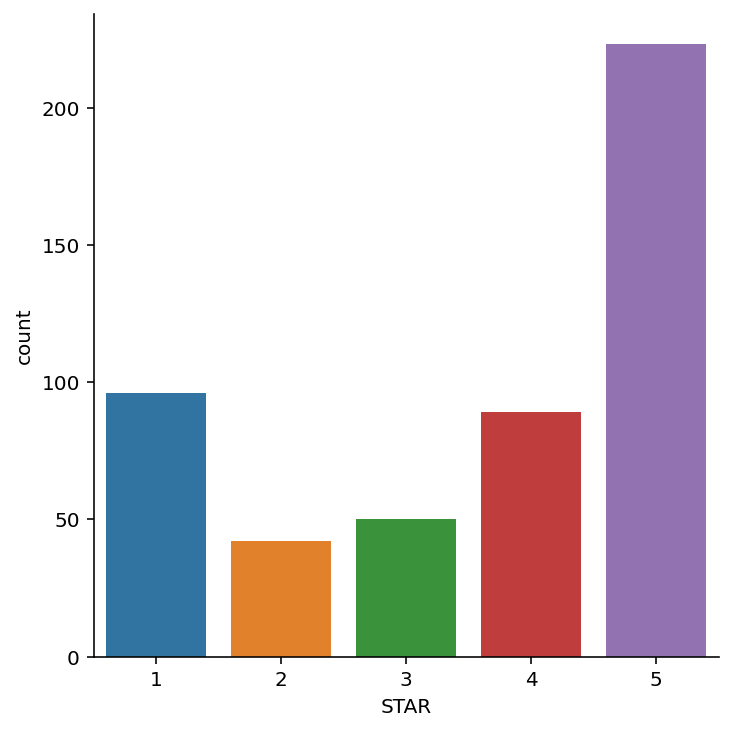

In [ ]:
sns.factorplot('STAR',kind='count',data=df)

In [ ]:
df['STAR'].value_counts()

5    223
1     96
4     89
3     50
2     42
Name: STAR, dtype: int64

In [ ]:
high_rate_review = df[df['STAR'] >= 4]['REVIEW']
low_rate_review = df[df['STAR'] <= 3]['REVIEW']

In [ ]:
len(high_rate_review)

312

In [ ]:
type(high_rate_review.values)

numpy.ndarray

In [ ]:
len(low_rate_review)

188

In [ ]:
low_rate_review[:10]

1     I have had issues where I continually am notif...
2     Please model this after Halo (doc halo). Unfor...
3     Very buggy program and unreliable service.  Me...
4     I am a surgeon and take call for emergencies—b...
5     I primarily use Tigerconnect at night when I’m...
6     This worked for a while but Christmas Eve it h...
7     This past week has been awful dealing with thi...
8                    All new messages are on backwards.
9     I am getting alerts but need to log on to desk...
10    A notification every 2 minutes per message is ...
Name: REVIEW, dtype: object

In [ ]:
high_rate_review = high_rate_review.apply(lambda x:re.sub('[^a-zA-Z\s\d]',"",x))
low_rate_review = low_rate_review.apply(lambda x:re.sub('[^a-zA-Z\s\d]',"",x))

In [ ]:
high_rate_review[:10]

0     The ability to document share and forward mess...
18    Would appreciate it if the app followed the iP...
19    I love this app We relied sooo heavily on phon...
30    Staff love it revolutionized our ability to co...
31    I only have been using this app for a short wh...
32    We run a large multispecialty group with now 2...
33    Rolespersonabased Messaging Scheduling integra...
34    TigerFlow is at the core of our digital transf...
35            Super reliable and great customer support
36    I have been using app for almost a year Loving...
Name: REVIEW, dtype: object

In [ ]:
low_rate_review[:10]

1     I have had issues where I continually am notif...
2     Please model this after Halo doc halo Unfortun...
3     Very buggy program and unreliable service  Mes...
4     I am a surgeon and take call for emergenciesbu...
5     I primarily use Tigerconnect at night when Im ...
6     This worked for a while but Christmas Eve it h...
7     This past week has been awful dealing with thi...
8                     All new messages are on backwards
9     I am getting alerts but need to log on to desk...
10    A notification every 2 minutes per message is ...
Name: REVIEW, dtype: object

In [ ]:
low_rate_review[3]

'Very buggy program and unreliable service  Messages are frequently delayed  Still alerts that messages are unread even after reading them seems to happen when Im signed into a role  Still not compatible with CarPlay which is ridiculous since texting and driving is illegal in most states'

#자연어 처리
* 단어 word count 정도만 체크
* 리뷰라 없을 것 같지만 1단어만 작성한 것은 제외

In [ ]:
def get_word(sentence):
    text = sentence.split()
    token_tag = nltk.pos_tag(text)
    nouns = [x[0] for x in token_tag if x[1] in ['NN', 'JJ']]   
    return [noun for noun in nouns if len(noun) > 1]

#3점 이하의 word count

In [ ]:
low_countvector = CountVectorizer(tokenizer=get_word, max_features=300)
low_tdf = low_countvector.fit_transform(low_rate_review)
low_words = low_countvector.get_feature_names()

count_mat = low_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
low_rating_word_count = list(zip(low_words, count))
low_rating_word_count = sorted(low_rating_word_count, key=lambda t:t[1], reverse=True)

In [ ]:
low_rating_word_count[:15]

[('app', 130),
 ('text', 49),
 ('message', 38),
 ('update', 37),
 ('other', 22),
 ('new', 21),
 ('good', 19),
 ('great', 18),
 ('phone', 18),
 ('tiger', 18),
 ('password', 16),
 ('cant', 15),
 ('im', 15),
 ('please', 14),
 ('time', 14)]

#4점 이상 평점의 word count

In [ ]:
high_countvector = CountVectorizer(tokenizer=get_word, max_features=300)
high_tdf = high_countvector.fit_transform(high_rate_review)
high_words = high_countvector.get_feature_names()

count_mat = high_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
high_rating_word_count = list(zip(high_words, count))
high_rating_word_count = sorted(high_rating_word_count, key=lambda t:t[1], reverse=True)

In [ ]:
high_rating_word_count[:15]

[('app', 146),
 ('great', 82),
 ('text', 43),
 ('good', 34),
 ('easy', 29),
 ('message', 25),
 ('private', 22),
 ('tigertext', 22),
 ('new', 20),
 ('awesome', 19),
 ('other', 17),
 ('time', 17),
 ('phone', 16),
 ('tiger', 16),
 ('able', 15)]

## WordCloud 그리기

In [ ]:
low_rating_document = low_rate_review.values
high_rating_document = high_rate_review.values

## 4점 이상의 Word Cloud
- 단, 형용사나 명사만 체크하진 않고.. 단순한 word count

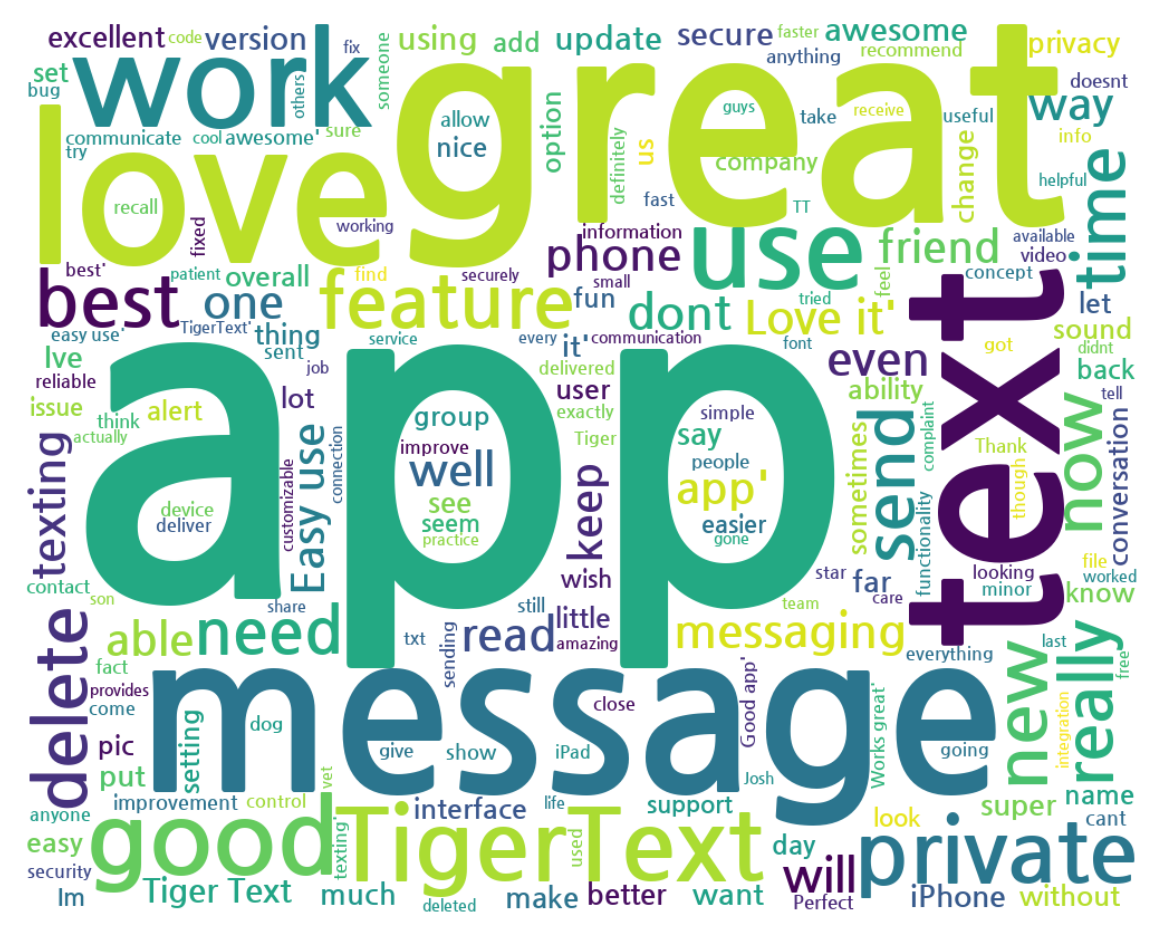

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path, stopwords=STOPWORDS).generate(np.array2string(high_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3점 이하의 Word Cloud
- 단, 형용사나 명사만 체크하진 않고.. 단순한 word count

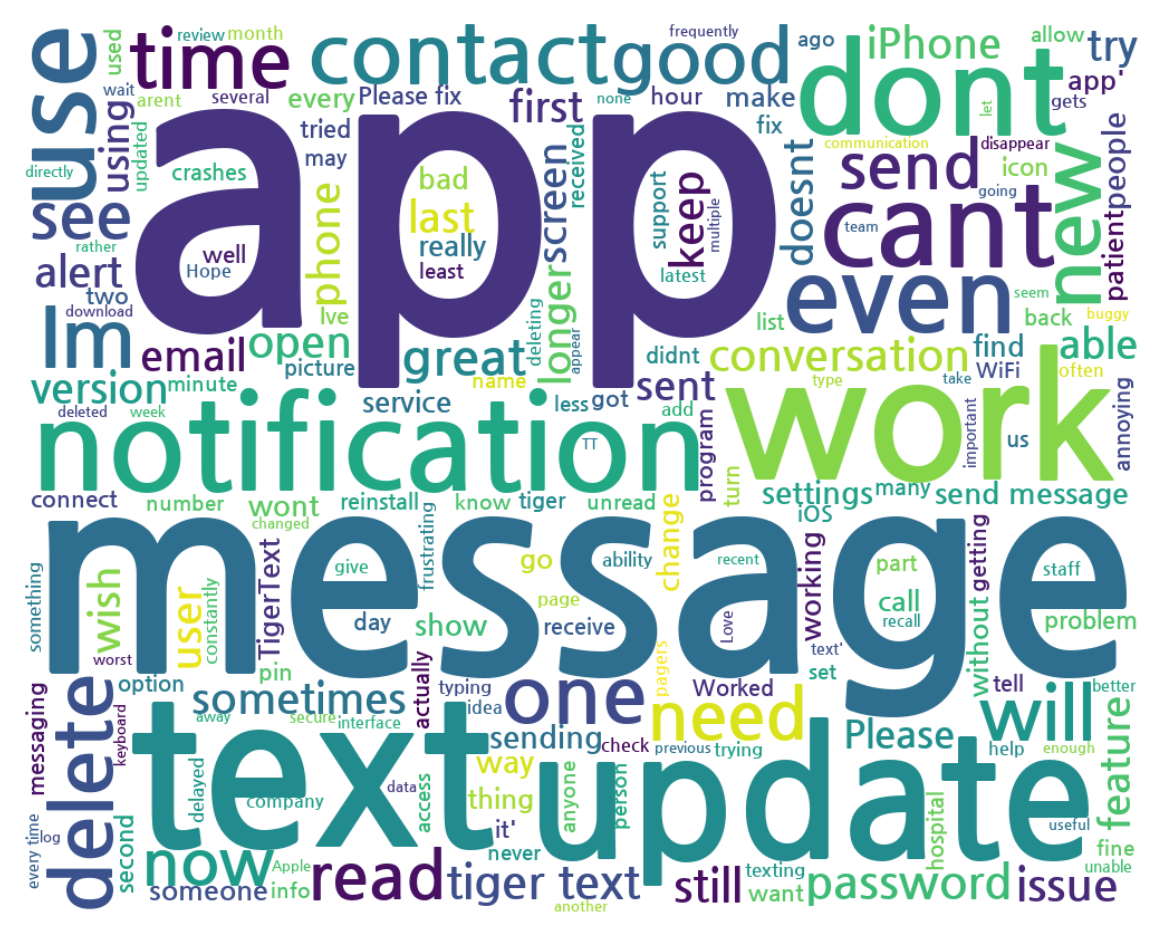

In [ ]:
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path, stopwords=STOPWORDS).generate(np.array2string(low_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

https://happygrammer.github.io/nlp/postag-set/

# 앱 사용자들이 중요하게 생각하는 요소 알아보기

In [ ]:
#stopwords = pd.read_excel('/content/drive/MyDrive/puzzleAI/스토어 앱리뷰 분석/stopwords.xlsx')['불용어'].to_list()

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
high_text = ''
for each_line in high_rate_review.tolist():
  high_text = high_text + each_line +'\n'

low_text = ''
for each_line in low_rate_review.tolist():
  low_text = low_text + each_line +'\n'

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# word_tokenize(high_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
tokens = [w for w in word_tokenize((high_text+low_text).lower()) if w not in stop_words]

In [ ]:
tokens[:10]

['ability',
 'document',
 'share',
 'forward',
 'messages',
 'extremely',
 'valuable',
 'easy',
 'use',
 'yet']

In [ ]:
tk = nltk.Text(tokens)
tk.vocab().most_common(10)

[('app', 291),
 ('text', 110),
 ('great', 100),
 ('messages', 97),
 ('use', 74),
 ('love', 67),
 ('message', 67),
 ('like', 66),
 ('good', 53),
 ('update', 52)]

In [ ]:
tk[:10]

['ability',
 'document',
 'share',
 'forward',
 'messages',
 'extremely',
 'valuable',
 'easy',
 'use',
 'yet']

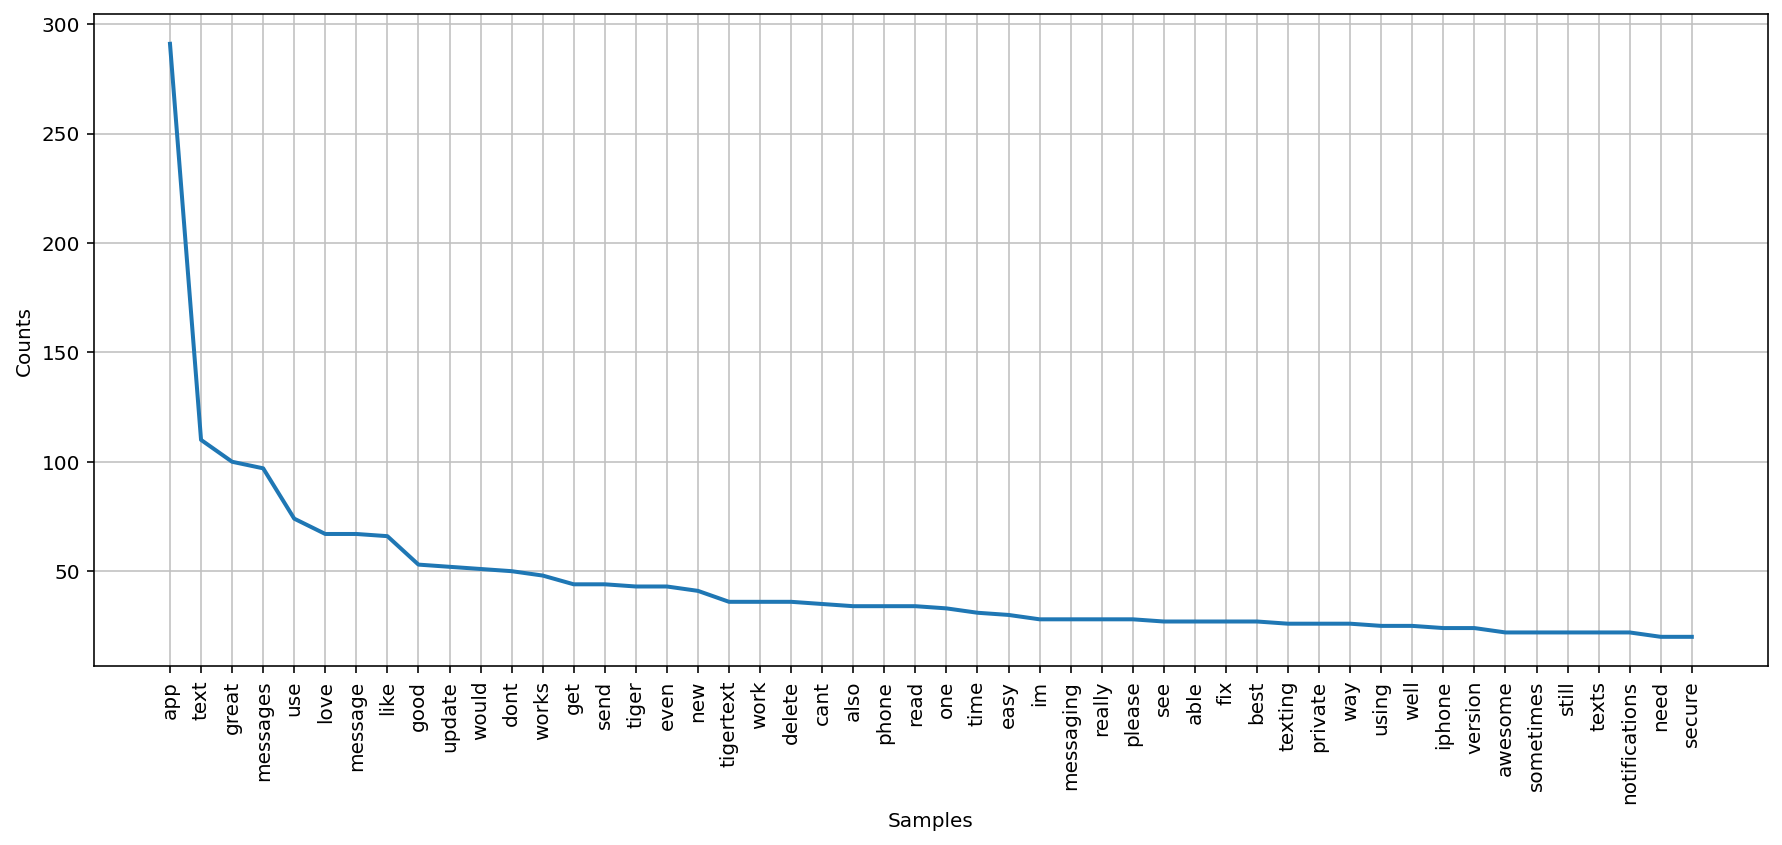

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz

plt.figure(figsize=(15,6))
tk.plot(50)
plt.show()